## Dataset analysis and cleaning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor

In [2]:
dataset = pd.read_csv('datasets/spotify_tracks.csv')
pd.set_option('display.max_columns', None)
dataset.shape

(114000, 21)

In [3]:
dataset.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


<span style="color:blue">**NUMERICAL**</span> and <span style="color:red">**CATEGORICAL**</span> features of the dataset :

- <span style="color:orange">**popularity**</span>: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

- <span style="color:red">**track_id**</span>: The Spotify ID for the track

- <span style="color:red">**artists**</span>: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

- <span style="color:red">**album_name**</span>: The album name in which the track appears

- <span style="color:red">**track_name**</span>: Name of the track

- <span style="color:blue">**duration_ms**</span>: The track length in milliseconds

- <span style="color:red">**explicit**</span>: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

- <span style="color:blue">**danceability**</span>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

- <span style="color:blue">**energy**</span>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
 
- <span style="color:red">**key**</span>: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
    
- <span style="color:blue">**loudness**</span>: The overall loudness of a track in decibels (dB)

- <span style="color:red">**mode**</span>: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
    
- <span style="color:blue">**speechiness**</span>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
    
- <span style="color:blue">**acousticness**</span>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
    
- <span style="color:blue">**instrumentalness**</span>: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
    
- <span style="color:blue">**liveness**</span>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
    
- <span style="color:blue">**valence**</span>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
    
- <span style="color:blue">**tempo**</span>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
    
- <span style="color:red">**time_signature**</span>: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

- <span style="color:red">**track_genre**</span>: The genre in which the track belongs

Checking if there are missing values and, consequently, dropping the rows with missing values

In [4]:
dataset.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
dataset.dropna(inplace=True)

Checking the number of distinct values for each column

There are multiple rows with the same **track_id**

In [6]:
dataset.nunique(axis=0)

Unnamed: 0          113999
track_id             89740
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50696
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45652
time_signature           5
track_genre            114
dtype: int64

In [7]:
dataset.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Rows are uniformly divided by **track_genre**

In [8]:
dataset['track_genre'].value_counts().sort_values()

track_genre
k-pop           999
alternative    1000
ambient        1000
anime          1000
black-metal    1000
               ... 
trip-hop       1000
turkish        1000
sleep          1000
punk           1000
indie          1000
Name: count, Length: 114, dtype: int64

In [9]:
genres = list(map(lambda x : 'GENRE_' + x, dataset['track_genre'].unique()))

We can drop the column **Unnamed: 0** because it's not useful

Then we can drop some duplicate rows of the dataset

In [10]:
dataset.drop(columns=['Unnamed: 0'], inplace=True)
dataset.drop_duplicates(inplace=True)

In [11]:
columns_except_track_genre = list(dataset.columns)
columns_except_track_genre.remove('track_genre')

columns_except_track_genre_and_popularity = list(dataset.columns)
columns_except_track_genre_and_popularity.remove('track_genre')
columns_except_track_genre_and_popularity.remove('popularity')

Dataset now has 113549 rows

There are rows that are completely equal except for their **track_genre** attribute

We aggregate these rows joining their **track_genre** attributes with a semicolon

After this operation the dataset will have 90460 rows, 23089 less than before

In [12]:
dataset = dataset.groupby(columns_except_track_genre)['track_genre'].apply(lambda x: ';'.join(x)).reset_index()
dataset.shape

(90460, 20)

In [13]:
dataset.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.003010,0.1540,0.432,104.042,4,german
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.000000,0.1170,0.341,178.174,4,club
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.181000,0.1110,0.108,119.997,4,minimal-techno
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.000000,0.0825,0.839,161.721,4,hip-hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.720000,0.0916,0.234,129.971,4,minimal-techno
5,0017XiMkqbTfF2AUOzlhj6,Chad Daniels,Busy Being Awesome,Thanksgiving Chicken,24,127040,True,0.536,0.780,5,-9.449,0,0.9450,0.792000,0.000000,0.7350,0.452,173.912,3,comedy
6,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,chill;soul
7,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock;ska
8,001pyq8FLNSL1C8orNLI0b,Old Crow Medicine Show,O.C.M.S.,Poor Man,30,214600,False,0.580,0.290,2,-11.942,1,0.0272,0.261000,0.000000,0.1250,0.497,91.321,4,bluegrass
9,002qpSULhHAw6DGqFxbaO1,Tokyo Ghetto Pussy,Disco 2001,Love Generation,17,410666,False,0.531,0.950,9,-9.744,0,0.0433,0.001220,0.826000,0.0613,0.553,159.974,4,happy


In [14]:
dataset['track_genre'].value_counts().sort_values()

track_genre
alt-rock;blues;rock                    1
honky-tonk;rockabilly                  1
indian;indie-pop;indie;malay;rock      1
anime;j-pop;j-rock;punk-rock           1
german;progressive-house               1
                                    ... 
salsa                                989
idm                                  990
sleep                                997
study                                998
tango                                999
Name: count, Length: 1436, dtype: int64

There are still some pairs of examples with the same **track_id**

In [15]:
dataset.nunique(axis=0)

track_id            89740
artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50696
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45652
time_signature          5
track_genre          1436
dtype: int64

In [16]:
dataset['track_id'].value_counts()

track_id
2wSEG8f9WIqyrdlXjdxzGu    2
2WyKvnMEF9H8CKHvmAXSm3    2
14dJexYlvd3t3XAtD1pYW1    2
0vp47IigZ7JVQ89jDetO7H    2
4ElNxglBjcrASiGn58t9Jm    2
                         ..
2bsyecmZCgdlsCZ3sWVZ99    1
2bsehqodemh5uNa72hwWJ7    1
2bsTRbvMKmgyDYr0mK3jTe    1
2bsF8h0aj0bgLSgG2FwdeU    1
7zz7iNGIWhmfFE7zlXkMma    1
Name: count, Length: 89740, dtype: int64

All these pairs are the same row except for **track_genre** and **popularity**

In [17]:
len(dataset.groupby(columns_except_track_genre_and_popularity).groups)

89740

In [18]:
dataset[dataset['track_id'] == '2wSEG8f9WIqyrdlXjdxzGu']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
34163,2wSEG8f9WIqyrdlXjdxzGu,iamjakehill,Sleeping All Alone,Sleeping All Alone,53,210067,True,0.812,0.38,5,-8.171,1,0.0362,0.712,0.0,0.0994,0.899,115.975,4,sad
34164,2wSEG8f9WIqyrdlXjdxzGu,iamjakehill,Sleeping All Alone,Sleeping All Alone,54,210067,True,0.812,0.38,5,-8.171,1,0.0362,0.712,0.0,0.0994,0.899,115.975,4,emo


We aggregate these pairs of rows joining their **track_genre** attributes with a semicolon and taking the mean of their **popularity** attributes

In [19]:
dataset = dataset.groupby(columns_except_track_genre_and_popularity, as_index=False).agg({'popularity' : lambda x: floor(np.mean(x)), 
                                                                                          'track_genre' : lambda x: ';'.join(x)})

In [20]:
dataset[dataset['track_id'] == '2wSEG8f9WIqyrdlXjdxzGu']

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,track_genre
33884,2wSEG8f9WIqyrdlXjdxzGu,iamjakehill,Sleeping All Alone,Sleeping All Alone,210067,True,0.812,0.38,5,-8.171,1,0.0362,0.712,0.0,0.0994,0.899,115.975,4,53,sad;emo


In [21]:
dataset['track_genre'].value_counts().sort_values()

track_genre
alt-rock;blues;rock                                                                    1
chill;singer-songwriter;songwriter                                                     1
children;disney                                                                        1
blues;british;country;folk;psych-rock                                                  1
blues;country;folk;j-pop;j-rock;power-pop;psych-rock;singer-songwriter;songwriter      1
                                                                                    ... 
comedy                                                                               989
idm                                                                                  990
sleep                                                                                997
study                                                                                998
tango                                                                                999
Name: cou

Finally **track_id** has become a unique identifier of the songs

We can now drop the column **track_id** because it has no predictive power

Removing **track_id** introduces a few duplicates, we drop them

In [22]:
dataset.shape

(89740, 20)

In [23]:
dataset.nunique(axis=0)

track_id            89740
artists             31437
album_name          46589
track_name          73608
duration_ms         50696
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45652
time_signature          5
popularity            101
track_genre          1584
dtype: int64

In [24]:
dataset.drop(columns=['track_id'], inplace=True)
dataset.drop_duplicates(inplace=True)
dataset.shape

(89665, 19)

We can now transform each genre in a boolean feature and remove the **track_genre** column

- <span style="color:red">**GENRE_{genre_name}**</span>: Boolean feature that indicates whether or not the track belongs to the genre genre_name

In [25]:
temp = pd.DataFrame(dict.fromkeys(genres, 0), index=dataset.index)
dataset = pd.concat([dataset, temp], axis=1)
dataset.head(10)

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,track_genre,GENRE_acoustic,GENRE_afrobeat,GENRE_alt-rock,GENRE_alternative,GENRE_ambient,GENRE_anime,GENRE_black-metal,GENRE_bluegrass,GENRE_blues,GENRE_brazil,GENRE_breakbeat,GENRE_british,GENRE_cantopop,GENRE_chicago-house,GENRE_children,GENRE_chill,GENRE_classical,GENRE_club,GENRE_comedy,GENRE_country,GENRE_dance,GENRE_dancehall,GENRE_death-metal,GENRE_deep-house,GENRE_detroit-techno,GENRE_disco,GENRE_disney,GENRE_drum-and-bass,GENRE_dub,GENRE_dubstep,GENRE_edm,GENRE_electro,GENRE_electronic,GENRE_emo,GENRE_folk,GENRE_forro,GENRE_french,GENRE_funk,GENRE_garage,GENRE_german,GENRE_gospel,GENRE_goth,GENRE_grindcore,GENRE_groove,GENRE_grunge,GENRE_guitar,GENRE_happy,GENRE_hard-rock,GENRE_hardcore,GENRE_hardstyle,GENRE_heavy-metal,GENRE_hip-hop,GENRE_honky-tonk,GENRE_house,GENRE_idm,GENRE_indian,GENRE_indie-pop,GENRE_indie,GENRE_industrial,GENRE_iranian,GENRE_j-dance,GENRE_j-idol,GENRE_j-pop,GENRE_j-rock,GENRE_jazz,GENRE_k-pop,GENRE_kids,GENRE_latin,GENRE_latino,GENRE_malay,GENRE_mandopop,GENRE_metal,GENRE_metalcore,GENRE_minimal-techno,GENRE_mpb,GENRE_new-age,GENRE_opera,GENRE_pagode,GENRE_party,GENRE_piano,GENRE_pop-film,GENRE_pop,GENRE_power-pop,GENRE_progressive-house,GENRE_psych-rock,GENRE_punk-rock,GENRE_punk,GENRE_r-n-b,GENRE_reggae,GENRE_reggaeton,GENRE_rock-n-roll,GENRE_rock,GENRE_rockabilly,GENRE_romance,GENRE_sad,GENRE_salsa,GENRE_samba,GENRE_sertanejo,GENRE_show-tunes,GENRE_singer-songwriter,GENRE_ska,GENRE_sleep,GENRE_songwriter,GENRE_soul,GENRE_spanish,GENRE_study,GENRE_swedish,GENRE_synth-pop,GENRE_tango,GENRE_techno,GENRE_trance,GENRE_trip-hop,GENRE_turkish,GENRE_world-music
0,Rill,Lolly,Lolly,160725,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.003010,0.1540,0.432,104.042,4,44,german,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,322933,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.000000,0.1170,0.341,178.174,4,47,club,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,515360,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.181000,0.1110,0.108,119.997,4,22,minimal-techno,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Jordan Sandhu,Teeje Week,Teeje Week,190203,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.000000,0.0825,0.839,161.721,4,62,hip-hop,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Paul Kalkbrenner,Zeit,Tief,331240,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.720000,0.0916,0.234,129.971,4,19,minimal-techno,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Chad Daniels,Busy Being Awesome,Thanksgiving Chicken,127040,True,0.536,0.780,5,-9.449,0,0.9450,0.792000,0.000000,0.7350,0.452,173.912,3,24,comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [26]:
def fill_genres(row):
    track_genres = row['track_genre'].split(';')
    for g in track_genres:
        row['GENRE_' + g] = 1
    return row

dataset = dataset.apply(fill_genres, axis=1)

In [27]:
dataset.head(10)

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,track_genre,GENRE_acoustic,GENRE_afrobeat,GENRE_alt-rock,GENRE_alternative,GENRE_ambient,GENRE_anime,GENRE_black-metal,GENRE_bluegrass,GENRE_blues,GENRE_brazil,GENRE_breakbeat,GENRE_british,GENRE_cantopop,GENRE_chicago-house,GENRE_children,GENRE_chill,GENRE_classical,GENRE_club,GENRE_comedy,GENRE_country,GENRE_dance,GENRE_dancehall,GENRE_death-metal,GENRE_deep-house,GENRE_detroit-techno,GENRE_disco,GENRE_disney,GENRE_drum-and-bass,GENRE_dub,GENRE_dubstep,GENRE_edm,GENRE_electro,GENRE_electronic,GENRE_emo,GENRE_folk,GENRE_forro,GENRE_french,GENRE_funk,GENRE_garage,GENRE_german,GENRE_gospel,GENRE_goth,GENRE_grindcore,GENRE_groove,GENRE_grunge,GENRE_guitar,GENRE_happy,GENRE_hard-rock,GENRE_hardcore,GENRE_hardstyle,GENRE_heavy-metal,GENRE_hip-hop,GENRE_honky-tonk,GENRE_house,GENRE_idm,GENRE_indian,GENRE_indie-pop,GENRE_indie,GENRE_industrial,GENRE_iranian,GENRE_j-dance,GENRE_j-idol,GENRE_j-pop,GENRE_j-rock,GENRE_jazz,GENRE_k-pop,GENRE_kids,GENRE_latin,GENRE_latino,GENRE_malay,GENRE_mandopop,GENRE_metal,GENRE_metalcore,GENRE_minimal-techno,GENRE_mpb,GENRE_new-age,GENRE_opera,GENRE_pagode,GENRE_party,GENRE_piano,GENRE_pop-film,GENRE_pop,GENRE_power-pop,GENRE_progressive-house,GENRE_psych-rock,GENRE_punk-rock,GENRE_punk,GENRE_r-n-b,GENRE_reggae,GENRE_reggaeton,GENRE_rock-n-roll,GENRE_rock,GENRE_rockabilly,GENRE_romance,GENRE_sad,GENRE_salsa,GENRE_samba,GENRE_sertanejo,GENRE_show-tunes,GENRE_singer-songwriter,GENRE_ska,GENRE_sleep,GENRE_songwriter,GENRE_soul,GENRE_spanish,GENRE_study,GENRE_swedish,GENRE_synth-pop,GENRE_tango,GENRE_techno,GENRE_trance,GENRE_trip-hop,GENRE_turkish,GENRE_world-music
0,Rill,Lolly,Lolly,160725,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.003010,0.1540,0.432,104.042,4,44,german,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,322933,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.000000,0.1170,0.341,178.174,4,47,club,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,515360,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.181000,0.1110,0.108,119.997,4,22,minimal-techno,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Jordan Sandhu,Teeje Week,Teeje Week,190203,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.000000,0.0825,0.839,161.721,4,62,hip-hop,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Paul Kalkbrenner,Zeit,Tief,331240,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.720000,0.0916,0.234,129.971,4,19,minimal-techno,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Chad Daniels,Busy Being Awesome,Thanksgiving Chicken,127040,True,0.536,0.780,5,-9.449,0,0.9450,0.792000,0.000000,0.7350,0.452,173.912,3,24,comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [28]:
dataset.drop(columns=['track_genre'], inplace=True)

In [29]:
dataset.shape

(89665, 132)

The dataset is now cleaned and ready to be used to make predictions

In [30]:
dataset.to_csv('datasets/spotify_tracks_cleaned.csv', index=False)

In [31]:
dataset.nunique(axis=0)

artists              31437
album_name           46589
track_name           73608
duration_ms          50696
explicit                 2
                     ...  
GENRE_techno             2
GENRE_trance             2
GENRE_trip-hop           2
GENRE_turkish            2
GENRE_world-music        2
Length: 132, dtype: int64

In [32]:
dataset.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,GENRE_acoustic,GENRE_afrobeat,GENRE_alt-rock,GENRE_alternative,GENRE_ambient,GENRE_anime,GENRE_black-metal,GENRE_bluegrass,GENRE_blues,GENRE_brazil,GENRE_breakbeat,GENRE_british,GENRE_cantopop,GENRE_chicago-house,GENRE_children,GENRE_chill,GENRE_classical,GENRE_club,GENRE_comedy,GENRE_country,GENRE_dance,GENRE_dancehall,GENRE_death-metal,GENRE_deep-house,GENRE_detroit-techno,GENRE_disco,GENRE_disney,GENRE_drum-and-bass,GENRE_dub,GENRE_dubstep,GENRE_edm,GENRE_electro,GENRE_electronic,GENRE_emo,GENRE_folk,GENRE_forro,GENRE_french,GENRE_funk,GENRE_garage,GENRE_german,GENRE_gospel,GENRE_goth,GENRE_grindcore,GENRE_groove,GENRE_grunge,GENRE_guitar,GENRE_happy,GENRE_hard-rock,GENRE_hardcore,GENRE_hardstyle,GENRE_heavy-metal,GENRE_hip-hop,GENRE_honky-tonk,GENRE_house,GENRE_idm,GENRE_indian,GENRE_indie-pop,GENRE_indie,GENRE_industrial,GENRE_iranian,GENRE_j-dance,GENRE_j-idol,GENRE_j-pop,GENRE_j-rock,GENRE_jazz,GENRE_k-pop,GENRE_kids,GENRE_latin,GENRE_latino,GENRE_malay,GENRE_mandopop,GENRE_metal,GENRE_metalcore,GENRE_minimal-techno,GENRE_mpb,GENRE_new-age,GENRE_opera,GENRE_pagode,GENRE_party,GENRE_piano,GENRE_pop-film,GENRE_pop,GENRE_power-pop,GENRE_progressive-house,GENRE_psych-rock,GENRE_punk-rock,GENRE_punk,GENRE_r-n-b,GENRE_reggae,GENRE_reggaeton,GENRE_rock-n-roll,GENRE_rock,GENRE_rockabilly,GENRE_romance,GENRE_sad,GENRE_salsa,GENRE_samba,GENRE_sertanejo,GENRE_show-tunes,GENRE_singer-songwriter,GENRE_ska,GENRE_sleep,GENRE_songwriter,GENRE_soul,GENRE_spanish,GENRE_study,GENRE_swedish,GENRE_synth-pop,GENRE_tango,GENRE_techno,GENRE_trance,GENRE_trip-hop,GENRE_turkish,GENRE_world-music
count,8.966500e+04,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000,89665.000000
mean,2.291574e+05,0.562212,0.634551,5.283187,-8.498270,0.636882,0.087457,0.328273,0.173487,0.216997,0.469533,122.060431,3.897407,33.222004,0.011153,0.011141,0.011075,0.011086,0.011141,0.011141,0.011119,0.011130,0.011097,0.011130,0.011130,0.011130,0.011141,0.011130,0.011130,0.011141,0.010405,0.011097,0.011108,0.011108,0.010729,0.011141,0.011141,0.011130,0.011130,0.011119,0.011141,0.011108,0.011141,0.011141,0.011063,0.011086,0.011153,0.011130,0.011086,0.011130,0.011097,0.011141,0.011141,0.010718,0.011141,0.011130,0.011130,0.011130,0.011130,0.011130,0.011141,0.011075,0.011130,0.01

q1          : 19.0
q2 (median) : 33.0
q3          : 49.0
IQR         : 30.0


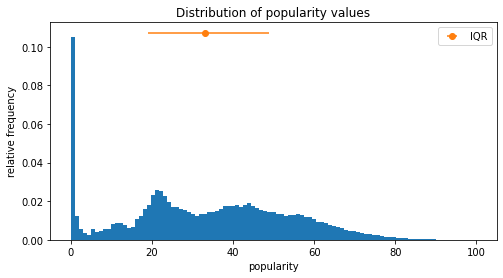

In [33]:
target = dataset['popularity']

q1 = np.quantile(target, 0.25)
q2 = np.quantile(target, 0.5)
q3 = np.quantile(target, 0.75)
iqr = q3 - q1

print(f'q1          : {q1}')
print(f'q2 (median) : {q2}')
print(f'q3          : {q3}')
print(f'IQR         : {iqr}')

fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(4)
n, _, _  = ax.hist(target, density=True, bins=101)
plt.errorbar(q2, max(n) + 0.002, xerr = [[q2-q1],[q3-q2]], fmt ='o', label="IQR") 
plt.xlabel("popularity")
plt.ylabel("relative frequency")
plt.title("Distribution of popularity values")
plt.legend()
plt.show()

In [34]:
d = dict(target.value_counts())
geq_60 = sum(d[i] for i in range(60,101))

print(f"There are {d[0]} examples with popularity = 0 , {d[0]*100/dataset.shape[0]:.2f} % of the total")
print(f"There are {geq_60} examples with popularity >= 60 , {geq_60*100/dataset.shape[0]:.2f} % of the total")

There are 9352 examples with popularity = 0 , 10.43 % of the total
There are 9797 examples with popularity >= 60 , 10.93 % of the total
